<a href="https://colab.research.google.com/github/chettkulkarni/MachineLearning/blob/master/Assignment_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire Predictions

Dataset:- We have the historical dataset collected by american governement on all the wildfires in history of usa from 1900 to 2015.

Hypothesis:- Predicting Wildfire Damage Area based on several different features including
FIRE_YEAR, STAT_CAUSE_DESCR, LATITUDE, LONGITUDE, STATE, DISCOVERY_DATE

Task of this ntebook is to find if we can find effective clusters on the bases of datasets that we have.


In [0]:
#importing libraries required and also connecting to the sqlite3 db wildfire dataset.

import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import KMeans

conn = sqlite3.connect('../FPA_FOD_20170508.sqlite')


In [0]:
conn

In [0]:
#extracting meaningful columns
df = pd.read_sql_query("SELECT FIRE_YEAR,SOURCE_REPORTING_UNIT,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,Shape,STAT_CAUSE_DESCR FROM 'Fires'", conn)

In [0]:
df.columns

Index(['FIRE_YEAR', 'SOURCE_REPORTING_UNIT', 'LATITUDE', 'LONGITUDE', 'STATE',
       'DISCOVERY_DATE', 'FIRE_SIZE', 'Shape', 'STAT_CAUSE_DESCR'],
      dtype='object')

In [0]:
#finding pearson corelation in the dataset
pearsoncorr=df.corr()

The data in the dataset is hily un-corelated.

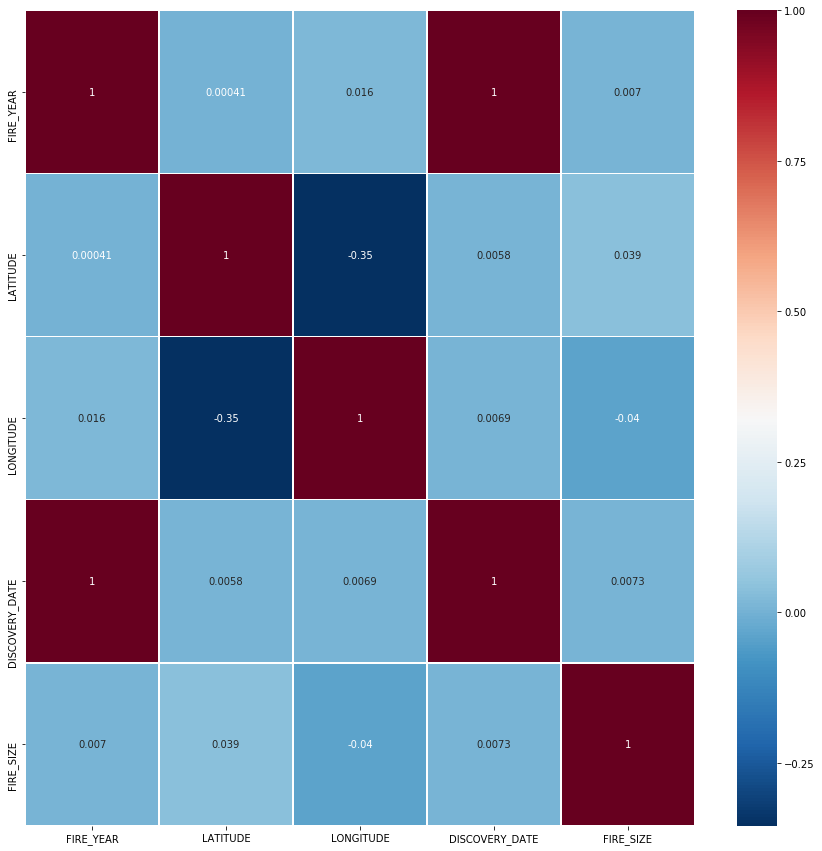

In [0]:

import seaborn as sb

plt.figure(1,figsize=(15,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# Kmeans on fire size vs Fire Cause

Even if the dataset doesnt have corelation wanted to explore if clusters can be formed on the bases of 

1)fire size and fire cause.

2)fire size and fire year

as our important feature at hand is fire size

In [0]:
le = preprocessing.LabelEncoder()

labelencoderlist=['STATE','STAT_CAUSE_DESCR']

In [0]:
le.fit(df.STATE)
df.STATE=le.transform(df.STATE)

le.fit(df.STAT_CAUSE_DESCR)
df.STAT_CAUSE_DESCR=le.transform(df.STAT_CAUSE_DESCR)
df=df.drop(['Shape'],axis=1)

In [0]:
df=df.dropna()
df2=df[['FIRE_SIZE','STAT_CAUSE_DESCR']]

In [0]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

Using elbow method to find the optimal k for performing k means clustering

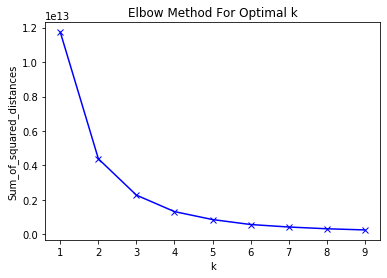

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

optimal k is 3

In [0]:
df3 = df[['FIRE_SIZE','STAT_CAUSE_DESCR']]
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(df2)
print(df3.head())

   FIRE_SIZE  STAT_CAUSE_DESCR
0       0.10                 7
1       0.25                 6
2       0.10                 3
3       0.10                 6
4       0.10                 6


In [0]:
kmeans.cluster_centers_

array([[4.00992752e+01, 4.51780867e+00],
       [2.89765451e+05, 5.72727273e+00],
       [7.06198230e+04, 5.76705491e+00]])

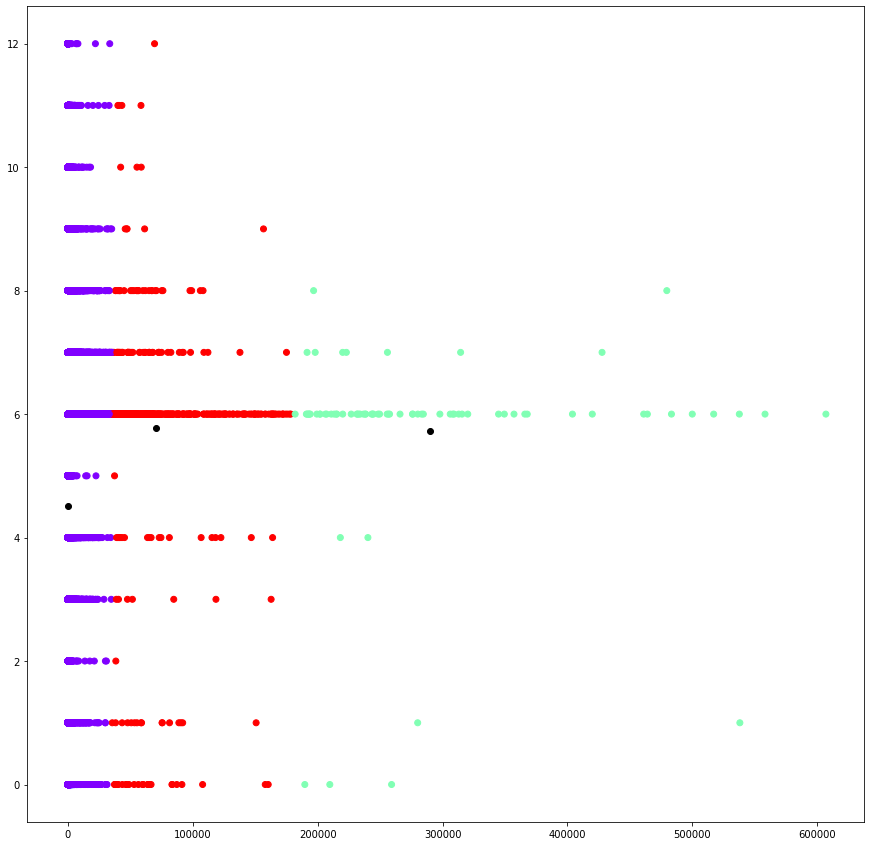

In [0]:
plt.figure(1,figsize=(15,15))
plt.scatter(df3.FIRE_SIZE, df3.STAT_CAUSE_DESCR, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

As observed above, no meaning ful clusters were formed on the bases of fire size vs fire cause

Also performing same steps for fire size vs state,and again no meaningful clusters are formed

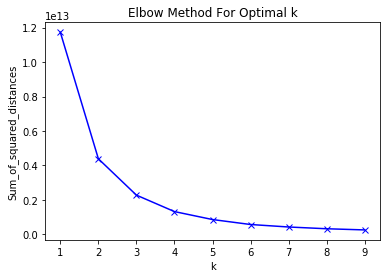

In [0]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
df3 = df[['FIRE_SIZE','FIRE_YEAR']]
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(df2)
print(df3.head())

   FIRE_SIZE  FIRE_YEAR
0       0.10       2005
1       0.25       2004
2       0.10       2004
3       0.10       2004
4       0.10       2004


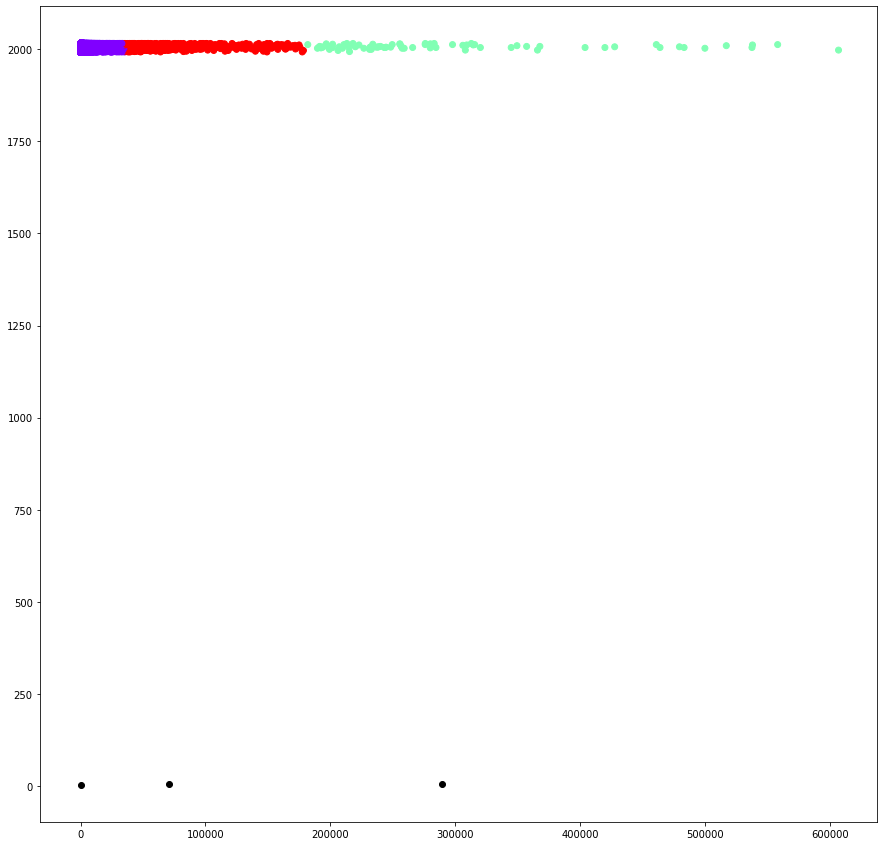

In [0]:
plt.figure(1,figsize=(15,15))
plt.scatter(df3.FIRE_SIZE, df3.FIRE_YEAR, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

# Agglomerative Clustering
Tried aggloemerative clustering and it did not execute becasue data set is huge (900 mb)

In [0]:
# from sklearn.cluster import AgglomerativeClustering 

In [0]:
# ac2 = AgglomerativeClustering(n_clusters = 2) 

In [0]:
# plt.figure(figsize =(6, 6)) 
# plt.scatter(df2.FIRE_SIZE, df2.FIRE_YEAR,  
#            c = ac2.fit_predict(df2), cmap ='rainbow') 
# plt.show() 

# Using TensorFlow KMeans

Tried applying Kmeans Clustering from Kmeans Tensorflow documentation.
Found two clusters using TensorFlow

In [0]:
import numpy as np
import tensorflow as tf

num_points = 100
dimensions = 2
# points = np.random.uniform(0, 1000, [num_points, dimensions])
points=df[['FIRE_SIZE','STAT_CAUSE_DESCR']]
def input_fn():
    return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(points, dtype=tf.float32), num_epochs=1)

num_clusters = 4
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    if previous_centers is not None:
        print('delta:', cluster_centers - previous_centers)
    previous_centers = cluster_centers
    print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]
    print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/8d/6z3j7y0n38nfd5nzd1trt4380000gn/T/tmpbsul9bdg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to 

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5: /var/folders/8d/6z3j7y0n38nfd5nzd1trt4380000gn/T/tmpbsul9bdg/model.ckpt-5
score: 10868026000000.0
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/8d/6z3j7y0n38nfd5nzd1trt4380000gn/T/tmpbsul9bdg/model.ckpt-5
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5...
INFO:tensorflow:Saving checkpoints for 5 into /var/folders/8d/6z3j7y0n38nfd5nzd1trt4380000gn/T/tmpbsul9bdg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5...
INFO:tensorflow:loss = 10868026000000.0, step = 6
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 7...
INFO:tensorflow:Saving checkpoints for 7 into /var/folders/8d/6z3j7y0n38nfd5nzd1trt43800

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/8d/6z3j7y0n38nfd5nzd1trt4380000gn/T/tmpbsul9bdg/model.ckpt-13
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 13...
INFO:tensorflow:Saving checkpoints for 13 into /var/folders/8d/6z3j7y0n38nfd5nzd1trt4380000gn/T/tmpbsul9bdg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 13...
INFO:tensorflow:loss = 5029162000000.0, step = 14
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 15...
INFO:tensorflow:Saving checkpoints for 15 into /var/folders/8d/6z3j7y0n38nfd5nzd1trt4380000gn/T/tmpbsul9bdg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 15...
INFO:tensorflow:Loss for final step: 5029162000000.0.
delta: [[ 2.5652516e+04 -4.2857170